# U.S. Medical Insurance Costs

### Goals
1. 
2. 
3. 

In [1]:
# Import libraries
import csv
import pandas as pd
import numpy as np

In [34]:
# Import dataset
patient_records = []
with open("insurance.csv", newline='') as insurance_csv:
    insurance_dict = csv.DictReader(insurance_csv)

    for row in insurance_dict:
        patient_records.append(row)

# Create dataframe
insurance_df = pd.read_csv('insurance.csv')

# Display the results
print(f"Total records: {len(patient_records)}")
print(f"First five records:")
for i, record in enumerate(patient_records[:5]):
    print(f"Record {i+1}: {record}")

Total records: 1338
First five records:
Record 1: {'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
Record 2: {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
Record 3: {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
Record 4: {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
Record 5: {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}


In [3]:
ages = []
sexes = []
bmis = []
num_children = []
smoker_status = []
regions = []
insurance_charges = []

In [4]:
# The function below will allow us to create a list of each column category and analyze each category individually
def load_list_data(lst, csv_file, col_name):
    with open(csv_file, newline = '') as csv_loaded:
        csv_dict = csv.DictReader(csv_loaded)

        for row in csv_dict:
            lst.append(row[col_name])
        return lst

In [5]:
load_list_data(ages, "insurance.csv", "age")
load_list_data(sexes, "insurance.csv", "sex")
load_list_data(bmis, "insurance.csv", "bmi")
load_list_data(num_children, "insurance.csv", "children")
load_list_data(smoker_status, "insurance.csv", "smoker")
load_list_data(regions, "insurance.csv", "region")
load_list_data(insurance_charges, "insurance.csv", "charges")

print(f"Data loaded successfully. Sample sizes: ages({len(ages)}), sexes({len(sexes)}), bmis({len(bmis)}), children({len(num_children)}), smoker status({len(smoker_status)}), geographic regions({len(regions)}), insurance charges({len(insurance_charges)}).")

Data loaded successfully. Sample sizes: ages(1338), sexes(1338), bmis(1338), children(1338), smoker status(1338), geographic regions(1338), insurance charges(1338).


In [6]:
class PatientInfo:
    # Define the attributes to be used in the following methods
    def __init__(self, patient_ages, patient_sexes, patient_bmis, patient_children, patient_smoker, patient_region, patient_charges):
        self.patient_ages = patient_ages
        self.patient_sexes = patient_sexes
        self.patient_bmis = patient_bmis
        self.patient_children = patient_children
        self.patient_smoker = patient_smoker
        self.patient_region = patient_region
        self.patient_charges = patient_charges
    
    # Method that calculates the age distribution (average, quartiles) of the patients within the dataset
    def analyze_ages(self):
        total_age = 0
        patient_ages_integer = list(map(int, self.patient_ages))
        for age in patient_ages_integer:
            total_age += age
        average_age = total_age / len(self.patient_ages)
        print(f"Average patient age: {round(average_age, 2)} years")

        q1_age = np.quantile(patient_ages_integer, 0.25)
        q2_age = np.quantile(patient_ages_integer, 0.50)
        q3_age = np.quantile(patient_ages_integer, 0.75)
        print(f"First quartile (25%): {round(q1_age, 2)} years")
        print(f"Second quartile (50%): {round(q2_age, 2)} years")
        print(f"Third quartile (75%): {round(q3_age, 2)} years")
    
    # Method that calculates what percentage of patients are male/female
    def analyze_sexes(self):
        male = 0
        female = 0
        for patient in self.patient_sexes:
            if patient.lower() == 'male':
                male += 1
            elif patient.lower() == 'female':
                female += 1
        male_percent = male / len(self.patient_sexes)
        female_percent = female / len(self.patient_sexes)
        print(f"Total patients in dataset: {len(self.patient_sexes)}")
        print(f"Number of male patients: {male}")
        print(f"Percent male: {round(male_percent * 100, 2)}%")
        print(f"Number of female patients: {female}")
        print(f"Percent female: {round(female_percent * 100, 2)}%")

    # Method that analyzes the bmi distribution (average, quartiles) of the patients within the dataset
    def analyze_bmis(self):
        total_bmi = 0
        patient_bmi_integer = list(map(float, self.patient_bmis))
        for value in patient_bmi_integer:
            total_bmi += value
        average_bmi = total_bmi / len(self.patient_bmis)
        print(f"Average patient BMI: {round(average_bmi, 2)}")
        
        q1_bmi = np.quantile(patient_bmi_integer, 0.25)
        q2_bmi = np.quantile(patient_bmi_integer, 0.50)
        q3_bmi = np.quantile(patient_bmi_integer, 0.75)
        print(f"First quartile (25%): {round(q1_bmi, 2)}")
        print(f"Second quartile (50%): {round(q2_bmi, 2)}")
        print(f"Third quartile (75%): {round(q3_bmi, 2)}")

    # Method that analyzes what percentage of patients have children, as well as the average number of children of each family
    def analyze_children(self):
        total_children = 0
        families_w_children = []
        total_children_families = 0
        patient_num_children_integer = list(map(int, self.patient_children))
        for patient in patient_num_children_integer:
            total_children += patient
            if patient >= 1:
                families_w_children.append(patient)
        for patient in families_w_children:
            total_children_families += patient
        percent_families_w_children = len(families_w_children) / len(patient_num_children_integer)
        
        print(f"Number of patients with children: {len(families_w_children)} ({round((percent_families_w_children*100), 2)}%)")

    # Method that calculates what percentage of patients are smokers
    def analyze_smokers(self):
        total_smokers = 0
        for patient in self.patient_smoker:
            if patient == 'yes':
                total_smokers += 1
        percent_smoker = total_smokers / len(self.patient_smoker)
        print(f"Percent patient population that actively smokes: {round(percent_smoker * 100, 2)}%")
        
    # Method that returns what unique geographic regions patients are from
    def analyze_regions(self):
        region_dict = {}
        for reg in self.patient_region:
            if reg in region_dict:
                region_dict[reg] += 1
            else:
                region_dict[reg] = 1
        return region_dict
        print("Number of patients from each geographic region: ")
        for region, count in region_dict.items():
            print(f"Region: {region}, Count: {count}")
    
    # Method that analyzes the distribution of insurance charges (average, quartiles) of the patients within the dataset
    def analyze_charges(self):
        total_insurance_charges = 0
        insurance_charges_integer = list(map(float, self.patient_charges))
        for value in insurance_charges_integer:
            total_insurance_charges += value
        average_charge = total_insurance_charges / len(insurance_charges_integer)
        print(f"Average insurance cost across all patients: ${round(average_charge, 2)}")

        q1_charge = np.quantile(insurance_charges_integer, 0.25)
        q2_charge = np.quantile(insurance_charges_integer, 0.50)
        q3_charge = np.quantile(insurance_charges_integer, 0.75)
        print(f"First quartile (25%): ${round(q1_charge, 2)}")
        print(f"Second quartile (50%): ${round(q2_charge, 2)}")
        print(f"Third quartile (75%): ${round(q3_charge, 2)}")

    # Method that creates a dictionary with all patient information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = [int(age) for age in self.patient_ages]
        self.patients_dictionary["sex"] = self.patient_sexes
        self.patients_dictionary["bmi"] = self.patient_bmis
        self.patients_dictionary["children"] = self.patient_children
        self.patients_dictionary["smoker"] = self.patient_smoker
        self.patients_dictionary["regions"] = self.patient_region
        self.patients_dictionary["charges"] = self.patient_charges
        return self.patients_dictionary

In [7]:
patient_info = PatientInfo(ages, sexes, bmis, num_children, smoker_status, regions, insurance_charges)

In [8]:
patient_info.analyze_ages()

Average patient age: 39.21 years
First quartile (25%): 27.0 years
Second quartile (50%): 39.0 years
Third quartile (75%): 51.0 years


In [9]:
patient_info.analyze_sexes()

Total patients in dataset: 1338
Number of male patients: 676
Percent male: 50.52%
Number of female patients: 662
Percent female: 49.48%


In [10]:
patient_info.analyze_bmis()

Average patient BMI: 30.66
First quartile (25%): 26.3
Second quartile (50%): 30.4
Third quartile (75%): 34.69


In [11]:
patient_info.analyze_children()

Number of patients with children: 764 (57.1%)


In [12]:
patient_info.analyze_smokers()

Percent patient population that actively smokes: 20.48%


In [13]:
patient_info.analyze_regions()

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}

In [14]:
patient_info.analyze_charges()

Average insurance cost across all patients: $13270.42
First quartile (25%): $4740.29
Second quartile (50%): $9382.03
Third quartile (75%): $16639.91


In [21]:
from matplotlib import pyplot as plt

C:\Users\Daelin\AppData\Local\Temp\ipykernel_44072\2525758847.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([male_insurance_cost, female_insurance_cost],


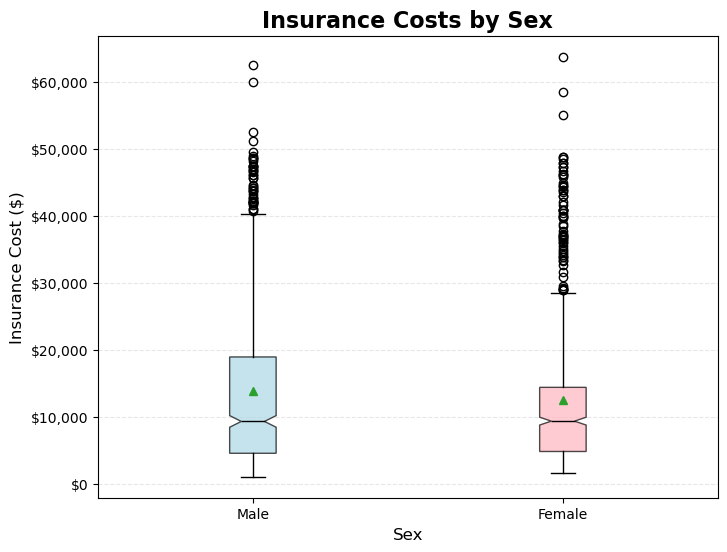

In [60]:
# Subset the insurance costs by sex
male_insurance_cost = [float(insurance_charges[i].replace('$', '').replace(',','')) for i in range(len(sexes)) if sexes[i] == 'male']
female_insurance_cost = [float(insurance_charges[i].replace('$','').replace(',','')) for i in range(len(sexes)) if sexes[i] == 'female']

fig, ax = plt.subplots(figsize=(8,6))
bp = ax.boxplot([male_insurance_cost, female_insurance_cost],
           labels = ['Male', 'Female'],
           patch_artist = True,
           notch = True,
           showmeans = True)
colors = ['lightblue', 'lightpink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[element], color='black')
ax.set_title("Insurance Costs by Sex", fontsize = 16, fontweight = 'bold')
ax.set_xlabel("Sex", fontsize = 12)
ax.set_ylabel("Insurance Cost ($)", fontsize = 12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.grid(axis = 'y', alpha = 0.3, linestyle = '--')

plt.savefig('insurance_cost_sex.png')
plt.show()

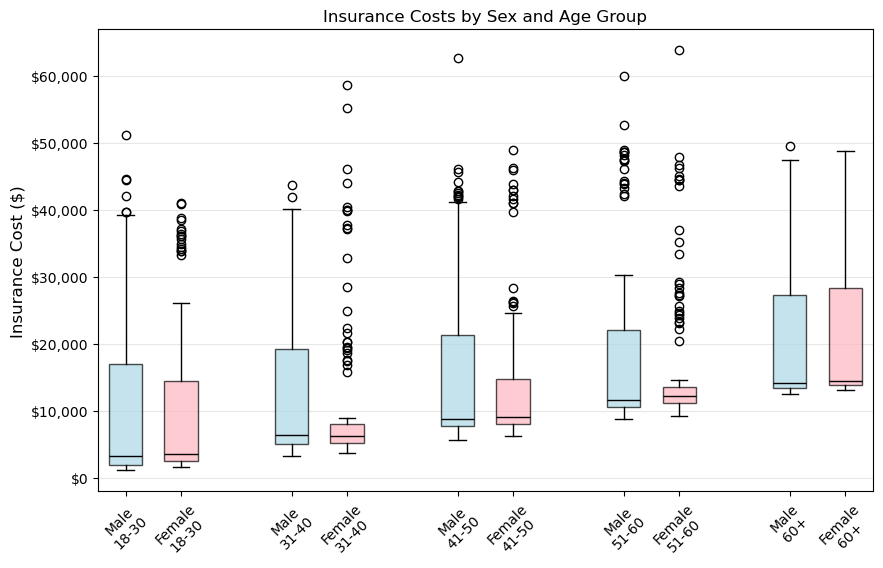

In [57]:
insurance_df['age_group'] = pd.cut(insurance_df['age'],
                                   bins = [0,30,40,50,60,100],
                                   labels = ['18-30','31-40','41-50','51-60','60+'])
age_groups = insurance_df['age_group'].cat.categories

positions = []
labels = []
data_to_plot = []

for i, age_group in enumerate(age_groups):
    male_data = insurance_df[(insurance_df['sex'] == 'male') & (insurance_df['age_group'] == age_group)]['charges']
    female_data = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['age_group'] == age_group)]['charges']

    if len(male_data) > 0:
        data_to_plot.append(male_data)
        positions.append(i*3)
        labels.append(f"Male\n{age_group}")

    if len(female_data) > 0:
        data_to_plot.append(female_data)
        positions.append(i*3 + 1)
        labels.append(f"Female\n{age_group}")

fig, ax = plt.subplots(figsize = (10,6))
bp = ax.boxplot(data_to_plot, 
            positions = positions,
            patch_artist = True,
            widths = 0.6)
colors = ['lightblue' if 'Male' in label else 'lightpink' for label in labels]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[element], color='black')
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation = 45)
ax.set_title("Insurance Costs by Sex and Age Group")
ax.set_ylabel('Insurance Cost ($)', fontsize = 12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.grid(axis='y', alpha=0.3)

plt.savefig('insurance_cost_sex_age.png')
plt.show()

### Age is a Driver of Insurance Costs
1. **Gender Differences**: There appears to be minimal differences between male and female insurance costs, even when broken down into age brackets.
2. **Age-Related Differences**: Insurance costs increase dramatically with age. The median costs progress from ~$4,000 for the 18-30 year old group to ~$15,000 for the 60+ year old group. This may reflect higher healthcare utilization and risk with increasing age.